# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [17]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, tree 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Генерация данных

In [4]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [15]:
colors = ListedColormap(['red', 'blue', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

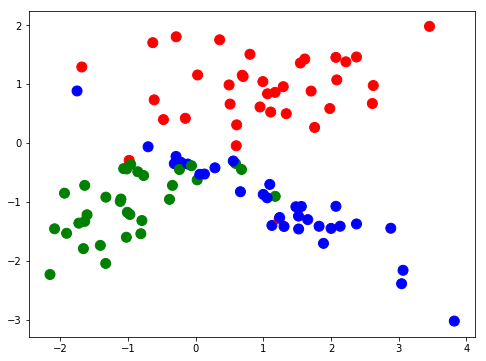

In [16]:
plt.figure(figsize=(8,6))
plt.scatter([i[0] for i in classification_problem[0]], [i[1] for i in classification_problem[0]], 
            c=classification_problem[1], cmap=colors, s=100);

In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(classification_problem[0], 
                                                                    classification_problem[1], 
                                                                    test_size=0.3,
                                                                    random_state=1)

### Модель DecisionTreeClassifier

In [19]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [20]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [21]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [22]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [23]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors=colors, light_colors=light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize=(16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

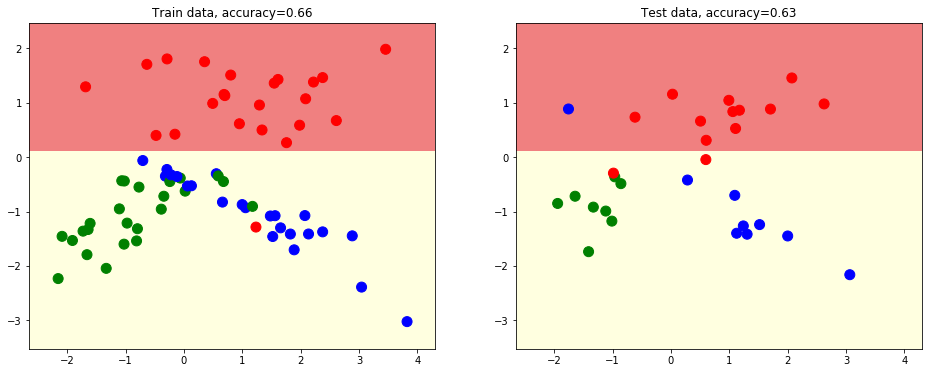

In [24]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

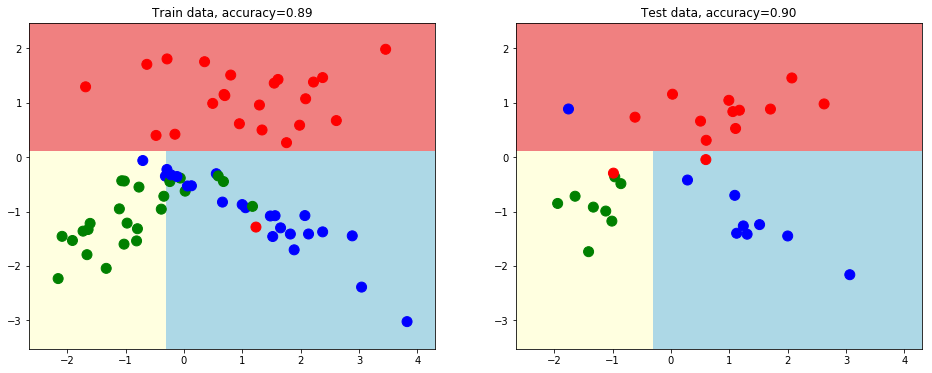

In [25]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth=2),
                      train_data, train_labels, test_data, test_labels)

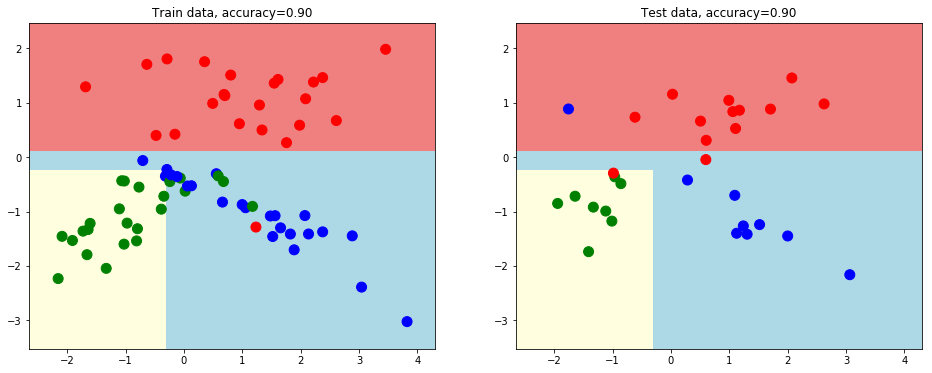

In [26]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth=3),
                      train_data, train_labels, test_data, test_labels)

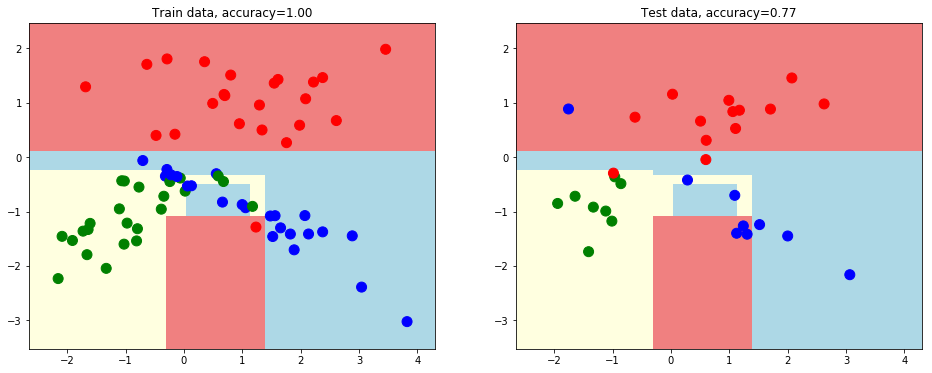

In [27]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1),
                      train_data, train_labels, test_data, test_labels)

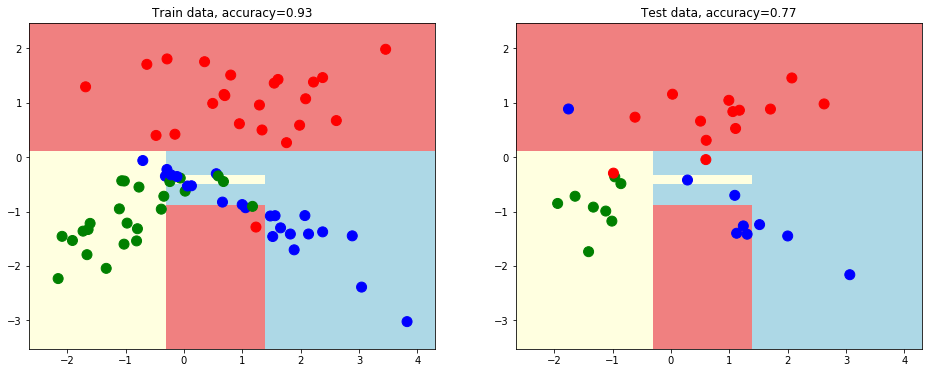

In [28]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3), 
                      train_data, train_labels, test_data, test_labels)